# Content analysis: analyze the content of tweets to determine what topics are being discussed and how they are being discussed.( TOPIC MODELING)



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import re
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
dataset = pd.read_csv('/content/IPL_2022_tweets.csv')

In [3]:
dataset.shape

(41631, 13)

In [4]:
dataset.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')

In [5]:
dataset.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,World Cricket Baba,india,! Links Baba:\nhttps://t.co/L3bxQ4jPHK\nhttps:...,2022-04-13 06:34:29,1076.0,63.0,699.0,False,2022-06-20 22:00:03,👉World Cricket Baba!👈 Top Countries With the \...,"['cricketBaba', 'IPL2022', 'Cricket', 'Deltin7...",Postify1,False
1,The Times Of India,New Delhi,News. Views. Analysis. Conversations. India’s ...,2010-04-19 10:50:15,14429584.0,457.0,6.0,True,2022-06-20 21:30:00,How fans of @ViratGang @BoldBrigade @Fanaticso...,"['IPL2022', 'RCB', 'MI', 'CSK', 'TOISportscast']",Twitter Web App,False
2,World Cricket Baba,india,! Links Baba:\nhttps://t.co/L3bxQ4jPHK\nhttps:...,2022-04-13 06:34:29,1076.0,63.0,699.0,False,2022-06-20 20:00:24,👉World Cricket Baba!👈 Top Countries With the \...,"['cricketBaba', 'IPL2022', 'Cricket', 'Deltin7...",Postify1,False
3,𝕊𝕠𝕔𝕚𝕒𝕝 𝔸𝕟𝕚𝕞𝕒𝕝,India,I’m here to avoid my friends on Facebook.,2013-10-15 04:34:14,124.0,502.0,2675.0,False,2022-06-20 19:10:00,@Chigurupati_H WOW!!\n3 ducks with 3 chicks!!\...,['IPL2022'],Twitter for Android,False
4,World Cricket Baba,india,! Links Baba:\nhttps://t.co/L3bxQ4jPHK\nhttps:...,2022-04-13 06:34:29,1076.0,63.0,699.0,False,2022-06-20 19:00:18,👉World Cricket Baba!👈 Top Countries With the \...,"['cricketBaba', 'IPL2022', 'Cricket', 'Deltin7...",Postify1,False


In [6]:
dataset.isna().sum()

user_name               0
user_location       12926
user_description     4612
user_created            1
user_followers          1
user_friends            1
user_favourites         1
user_verified           1
date                    1
text                    1
hashtags                1
source                  1
is_retweet              1
dtype: int64

In [7]:
dataset['user_location'].value_counts()

user_location
India                        3922
Mumbai, India                1527
New Delhi, India             1303
Kolkata, India                620
Bengaluru, India              518
                             ... 
Lonely Planet                   1
Chittagong, Bangladesh.🇧🇩       1
Tonk, Rajasthan🇮🇳INDIA          1
Imagination 😇                   1
sodepur , kolkata , India       1
Name: count, Length: 3714, dtype: int64

In [8]:
dataset['user_location'].fillna('India',inplace=True)

In [9]:
dataset.isnull().sum()

user_name              0
user_location          0
user_description    4612
user_created           1
user_followers         1
user_friends           1
user_favourites        1
user_verified          1
date                   1
text                   1
hashtags               1
source                 1
is_retweet             1
dtype: int64

# Data Cleaning

In [10]:
dataset.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,World Cricket Baba,india,! Links Baba:\nhttps://t.co/L3bxQ4jPHK\nhttps:...,2022-04-13 06:34:29,1076.0,63.0,699.0,False,2022-06-20 22:00:03,👉World Cricket Baba!👈 Top Countries With the \...,"['cricketBaba', 'IPL2022', 'Cricket', 'Deltin7...",Postify1,False
1,The Times Of India,New Delhi,News. Views. Analysis. Conversations. India’s ...,2010-04-19 10:50:15,14429584.0,457.0,6.0,True,2022-06-20 21:30:00,How fans of @ViratGang @BoldBrigade @Fanaticso...,"['IPL2022', 'RCB', 'MI', 'CSK', 'TOISportscast']",Twitter Web App,False
2,World Cricket Baba,india,! Links Baba:\nhttps://t.co/L3bxQ4jPHK\nhttps:...,2022-04-13 06:34:29,1076.0,63.0,699.0,False,2022-06-20 20:00:24,👉World Cricket Baba!👈 Top Countries With the \...,"['cricketBaba', 'IPL2022', 'Cricket', 'Deltin7...",Postify1,False
3,𝕊𝕠𝕔𝕚𝕒𝕝 𝔸𝕟𝕚𝕞𝕒𝕝,India,I’m here to avoid my friends on Facebook.,2013-10-15 04:34:14,124.0,502.0,2675.0,False,2022-06-20 19:10:00,@Chigurupati_H WOW!!\n3 ducks with 3 chicks!!\...,['IPL2022'],Twitter for Android,False
4,World Cricket Baba,india,! Links Baba:\nhttps://t.co/L3bxQ4jPHK\nhttps:...,2022-04-13 06:34:29,1076.0,63.0,699.0,False,2022-06-20 19:00:18,👉World Cricket Baba!👈 Top Countries With the \...,"['cricketBaba', 'IPL2022', 'Cricket', 'Deltin7...",Postify1,False


In [11]:
dataset['cleaned_tweet'] = dataset['text'].apply(lambda x: x.lower() if isinstance(x, str) else '')  # Convert to lowercase

In [12]:
dataset['cleaned_tweet'] = dataset['cleaned_tweet'].apply(lambda x: re.sub(r'http\S+|www\S+|https\S+', '', x, flags=re.MULTILINE) if isinstance(x, str) else '')  # Remove URLs

In [13]:
dataset['cleaned_tweet'] = dataset['cleaned_tweet'].apply(lambda x: re.sub(r'@\S+|#\S+', '', x) if isinstance(x, str) else '')  # Remove mentions and hashtags

In [14]:
dataset['cleaned_tweet'] = dataset['cleaned_tweet'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)) if isinstance(x, str) else '')  # Remove punctuation

In [15]:
dataset['tokenized_tweet'] = dataset['cleaned_tweet'].apply(lambda x: word_tokenize(x) if isinstance(x, str) else [])  # Tokenization

In [16]:
dataset.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,cleaned_tweet,tokenized_tweet
0,World Cricket Baba,india,! Links Baba:\nhttps://t.co/L3bxQ4jPHK\nhttps:...,2022-04-13 06:34:29,1076.0,63.0,699.0,False,2022-06-20 22:00:03,👉World Cricket Baba!👈 Top Countries With the \...,"['cricketBaba', 'IPL2022', 'Cricket', 'Deltin7...",Postify1,False,👉world cricket baba👈 top countries with the \n...,"[👉world, cricket, baba👈, top, countries, with,..."
1,The Times Of India,New Delhi,News. Views. Analysis. Conversations. India’s ...,2010-04-19 10:50:15,14429584.0,457.0,6.0,True,2022-06-20 21:30:00,How fans of @ViratGang @BoldBrigade @Fanaticso...,"['IPL2022', 'RCB', 'MI', 'CSK', 'TOISportscast']",Twitter Web App,False,how fans of and reacted to the two new ipl...,"[how, fans, of, and, reacted, to, the, two, ne..."
2,World Cricket Baba,india,! Links Baba:\nhttps://t.co/L3bxQ4jPHK\nhttps:...,2022-04-13 06:34:29,1076.0,63.0,699.0,False,2022-06-20 20:00:24,👉World Cricket Baba!👈 Top Countries With the \...,"['cricketBaba', 'IPL2022', 'Cricket', 'Deltin7...",Postify1,False,👉world cricket baba👈 top countries with the \n...,"[👉world, cricket, baba👈, top, countries, with,..."
3,𝕊𝕠𝕔𝕚𝕒𝕝 𝔸𝕟𝕚𝕞𝕒𝕝,India,I’m here to avoid my friends on Facebook.,2013-10-15 04:34:14,124.0,502.0,2675.0,False,2022-06-20 19:10:00,@Chigurupati_H WOW!!\n3 ducks with 3 chicks!!\...,['IPL2022'],Twitter for Android,False,wow\n3 ducks with 3 chicks\n,"[wow, 3, ducks, with, 3, chicks]"
4,World Cricket Baba,india,! Links Baba:\nhttps://t.co/L3bxQ4jPHK\nhttps:...,2022-04-13 06:34:29,1076.0,63.0,699.0,False,2022-06-20 19:00:18,👉World Cricket Baba!👈 Top Countries With the \...,"['cricketBaba', 'IPL2022', 'Cricket', 'Deltin7...",Postify1,False,👉world cricket baba👈 top countries with the \n...,"[👉world, cricket, baba👈, top, countries, with,..."


In [17]:
stop_words = set(stopwords.words('english'))
dataset['cleaned_tokens'] = dataset['tokenized_tweet'].apply(lambda tokens: [token for token in tokens if token not in stop_words])  # Remove stopwords

In [18]:
dataset.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,cleaned_tweet,tokenized_tweet,cleaned_tokens
0,World Cricket Baba,india,! Links Baba:\nhttps://t.co/L3bxQ4jPHK\nhttps:...,2022-04-13 06:34:29,1076.0,63.0,699.0,False,2022-06-20 22:00:03,👉World Cricket Baba!👈 Top Countries With the \...,"['cricketBaba', 'IPL2022', 'Cricket', 'Deltin7...",Postify1,False,👉world cricket baba👈 top countries with the \n...,"[👉world, cricket, baba👈, top, countries, with,...","[👉world, cricket, baba👈, top, countries, 🏆, be..."
1,The Times Of India,New Delhi,News. Views. Analysis. Conversations. India’s ...,2010-04-19 10:50:15,14429584.0,457.0,6.0,True,2022-06-20 21:30:00,How fans of @ViratGang @BoldBrigade @Fanaticso...,"['IPL2022', 'RCB', 'MI', 'CSK', 'TOISportscast']",Twitter Web App,False,how fans of and reacted to the two new ipl...,"[how, fans, of, and, reacted, to, the, two, ne...","[fans, reacted, two, new, ipl, teams, gujarat,..."
2,World Cricket Baba,india,! Links Baba:\nhttps://t.co/L3bxQ4jPHK\nhttps:...,2022-04-13 06:34:29,1076.0,63.0,699.0,False,2022-06-20 20:00:24,👉World Cricket Baba!👈 Top Countries With the \...,"['cricketBaba', 'IPL2022', 'Cricket', 'Deltin7...",Postify1,False,👉world cricket baba👈 top countries with the \n...,"[👉world, cricket, baba👈, top, countries, with,...","[👉world, cricket, baba👈, top, countries, 🏆, be..."
3,𝕊𝕠𝕔𝕚𝕒𝕝 𝔸𝕟𝕚𝕞𝕒𝕝,India,I’m here to avoid my friends on Facebook.,2013-10-15 04:34:14,124.0,502.0,2675.0,False,2022-06-20 19:10:00,@Chigurupati_H WOW!!\n3 ducks with 3 chicks!!\...,['IPL2022'],Twitter for Android,False,wow\n3 ducks with 3 chicks\n,"[wow, 3, ducks, with, 3, chicks]","[wow, 3, ducks, 3, chicks]"
4,World Cricket Baba,india,! Links Baba:\nhttps://t.co/L3bxQ4jPHK\nhttps:...,2022-04-13 06:34:29,1076.0,63.0,699.0,False,2022-06-20 19:00:18,👉World Cricket Baba!👈 Top Countries With the \...,"['cricketBaba', 'IPL2022', 'Cricket', 'Deltin7...",Postify1,False,👉world cricket baba👈 top countries with the \n...,"[👉world, cricket, baba👈, top, countries, with,...","[👉world, cricket, baba👈, top, countries, 🏆, be..."


In [19]:
lemmatizer = WordNetLemmatizer()
dataset['lemmatized_tokens'] = dataset['cleaned_tokens'].apply(lambda tokens: [lemmatizer.lemmatize(token) for token in tokens])  # Lemmatization

In [20]:
dataset.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,cleaned_tweet,tokenized_tweet,cleaned_tokens,lemmatized_tokens
0,World Cricket Baba,india,! Links Baba:\nhttps://t.co/L3bxQ4jPHK\nhttps:...,2022-04-13 06:34:29,1076.0,63.0,699.0,False,2022-06-20 22:00:03,👉World Cricket Baba!👈 Top Countries With the \...,"['cricketBaba', 'IPL2022', 'Cricket', 'Deltin7...",Postify1,False,👉world cricket baba👈 top countries with the \n...,"[👉world, cricket, baba👈, top, countries, with,...","[👉world, cricket, baba👈, top, countries, 🏆, be...","[👉world, cricket, baba👈, top, country, 🏆, best..."
1,The Times Of India,New Delhi,News. Views. Analysis. Conversations. India’s ...,2010-04-19 10:50:15,14429584.0,457.0,6.0,True,2022-06-20 21:30:00,How fans of @ViratGang @BoldBrigade @Fanaticso...,"['IPL2022', 'RCB', 'MI', 'CSK', 'TOISportscast']",Twitter Web App,False,how fans of and reacted to the two new ipl...,"[how, fans, of, and, reacted, to, the, two, ne...","[fans, reacted, two, new, ipl, teams, gujarat,...","[fan, reacted, two, new, ipl, team, gujarat, t..."
2,World Cricket Baba,india,! Links Baba:\nhttps://t.co/L3bxQ4jPHK\nhttps:...,2022-04-13 06:34:29,1076.0,63.0,699.0,False,2022-06-20 20:00:24,👉World Cricket Baba!👈 Top Countries With the \...,"['cricketBaba', 'IPL2022', 'Cricket', 'Deltin7...",Postify1,False,👉world cricket baba👈 top countries with the \n...,"[👉world, cricket, baba👈, top, countries, with,...","[👉world, cricket, baba👈, top, countries, 🏆, be...","[👉world, cricket, baba👈, top, country, 🏆, best..."
3,𝕊𝕠𝕔𝕚𝕒𝕝 𝔸𝕟𝕚𝕞𝕒𝕝,India,I’m here to avoid my friends on Facebook.,2013-10-15 04:34:14,124.0,502.0,2675.0,False,2022-06-20 19:10:00,@Chigurupati_H WOW!!\n3 ducks with 3 chicks!!\...,['IPL2022'],Twitter for Android,False,wow\n3 ducks with 3 chicks\n,"[wow, 3, ducks, with, 3, chicks]","[wow, 3, ducks, 3, chicks]","[wow, 3, duck, 3, chick]"
4,World Cricket Baba,india,! Links Baba:\nhttps://t.co/L3bxQ4jPHK\nhttps:...,2022-04-13 06:34:29,1076.0,63.0,699.0,False,2022-06-20 19:00:18,👉World Cricket Baba!👈 Top Countries With the \...,"['cricketBaba', 'IPL2022', 'Cricket', 'Deltin7...",Postify1,False,👉world cricket baba👈 top countries with the \n...,"[👉world, cricket, baba👈, top, countries, with,...","[👉world, cricket, baba👈, top, countries, 🏆, be...","[👉world, cricket, baba👈, top, country, 🏆, best..."


In [21]:
print(dataset['text'].head(20))

0     👉World Cricket Baba!👈 Top Countries With the \...
1     How fans of @ViratGang @BoldBrigade @Fanaticso...
2     👉World Cricket Baba!👈 Top Countries With the \...
3     @Chigurupati_H WOW!!\n3 ducks with 3 chicks!!\...
4     👉World Cricket Baba!👈 Top Countries With the \...
5     Reach me  to buy pre-ipo shares of Chennai Sup...
6     👉World Cricket Baba!👈 Top Countries\n 🏆 Best C...
7     Top 7 heart teaching wonderful deliveries shad...
8     Where is situated the battlefield of Plessey?\...
9     We are going to open a new store In tarakeswar...
10    Playing for #PunjabKings in the #IPL2022 #Shik...
11    I wish,  if Indian team selection criteria for...
12    👉World Cricket Baba!👈 Top Countries With the \...
13    Former selector Saba Karim on Sanju Samson’s r...
14    👉World Cricket Baba!👈 Top Countries With the \...
15    @ttc_sports Cover Drive \n\n#giveaway #cricket...
16    👉World Cricket Baba!👈 Top Countries With the \...
17    #WriddhimanSaha makes big statement on mak

In [22]:
print(dataset['lemmatized_tokens'].head(20))

0     [👉world, cricket, baba👈, top, country, 🏆, best...
1     [fan, reacted, two, new, ipl, team, gujarat, t...
2     [👉world, cricket, baba👈, top, country, 🏆, best...
3                              [wow, 3, duck, 3, chick]
4     [👉world, cricket, baba👈, top, country, 🏆, best...
5     [reach, buy, preipo, share, chennai, super, ki...
6     [👉world, cricket, baba👈, top, country, 🏆, best...
7     [top, 7, heart, teaching, wonderful, delivery,...
8     [situated, battlefield, plessey, punjab, b, ha...
9                 [going, open, new, store, tarakeswar]
10    [playing, scored, 460, run, 14, match, end, ei...
11    [wish, indian, team, selection, criterion, san...
12    [👉world, cricket, baba👈, top, country, 🏆, best...
13    [former, selector, saba, karim, sanju, samson,...
14    [👉world, cricket, baba👈, top, country, 🏆, best...
15                                 [cover, drive, join]
16    [👉world, cricket, baba👈, top, country, 🏆, best...
17    [make, big, statement, making, team, india

In [23]:
stemmer = PorterStemmer()  # Initialize PorterStemmer
dataset['stemmed_tokens'] = dataset['cleaned_tokens'].apply(lambda tokens: [stemmer.stem(token) for token in tokens])  # Apply stemming

In [24]:
dataset['text'].head(10)

0    👉World Cricket Baba!👈 Top Countries With the \...
1    How fans of @ViratGang @BoldBrigade @Fanaticso...
2    👉World Cricket Baba!👈 Top Countries With the \...
3    @Chigurupati_H WOW!!\n3 ducks with 3 chicks!!\...
4    👉World Cricket Baba!👈 Top Countries With the \...
5    Reach me  to buy pre-ipo shares of Chennai Sup...
6    👉World Cricket Baba!👈 Top Countries\n 🏆 Best C...
7    Top 7 heart teaching wonderful deliveries shad...
8    Where is situated the battlefield of Plessey?\...
9    We are going to open a new store In tarakeswar...
Name: text, dtype: object

In [25]:
dataset['stemmed_tokens'].head(10)

0    [👉world, cricket, baba👈, top, countri, 🏆, best...
1    [fan, react, two, new, ipl, team, gujarat, tit...
2    [👉world, cricket, baba👈, top, countri, 🏆, best...
3                             [wow, 3, duck, 3, chick]
4    [👉world, cricket, baba👈, top, countri, 🏆, best...
5    [reach, buy, preipo, share, chennai, super, ki...
6    [👉world, cricket, baba👈, top, countri, 🏆, best...
7    [top, 7, heart, teach, wonder, deliveri, shada...
8    [situat, battlefield, plessey, punjab, b, hary...
9                   [go, open, new, store, tarakeswar]
Name: stemmed_tokens, dtype: object

# Visualization

In [26]:
from wordcloud import WordCloud

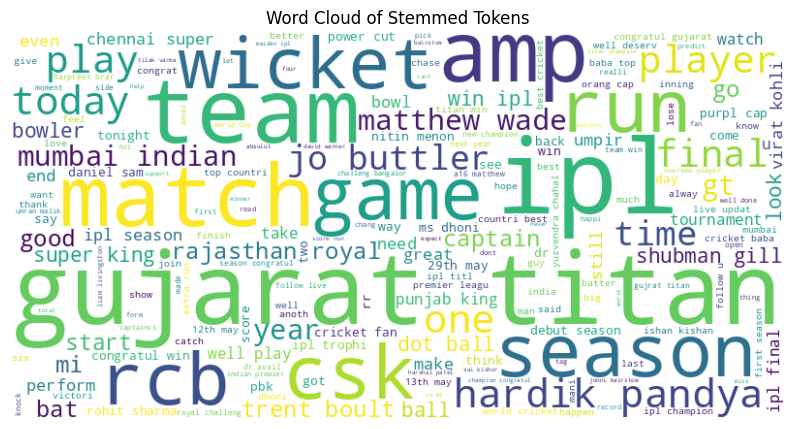

In [27]:
all_stemmed_tokens = ' '.join(dataset['stemmed_tokens'].explode().dropna())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_stemmed_tokens)

# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Stemmed Tokens')
plt.show()

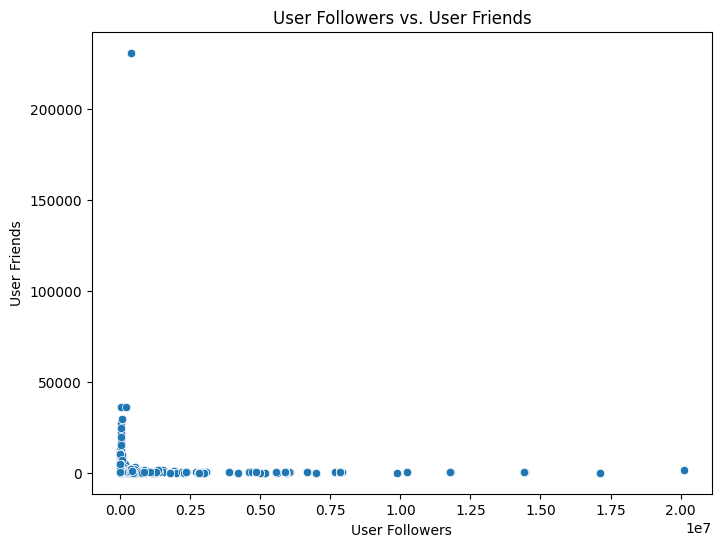

In [28]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='user_followers', y='user_friends', data=dataset)
plt.title('User Followers vs. User Friends')
plt.xlabel('User Followers')
plt.ylabel('User Friends')
plt.show()

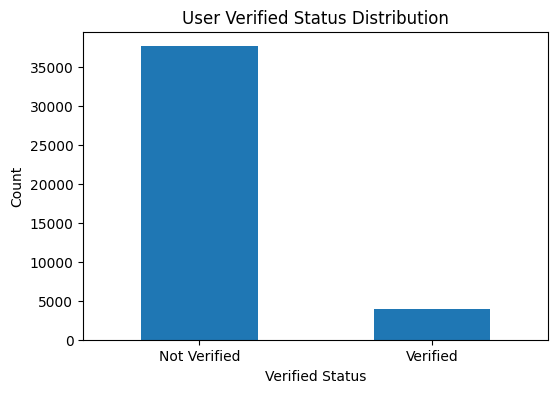

In [29]:
plt.figure(figsize=(6, 4))
dataset['user_verified'].value_counts().plot(kind='bar')
plt.title('User Verified Status Distribution')
plt.xlabel('Verified Status')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Verified', 'Verified'], rotation=0)
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2349 (\N{DEVANAGARI LETTER BHA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2366 (\N{DEVANAGARI VOWEL SIGN AA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2352 (\N{DEVANAGARI LETTER RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2340 (\N{DEVANAGARI LETTER TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


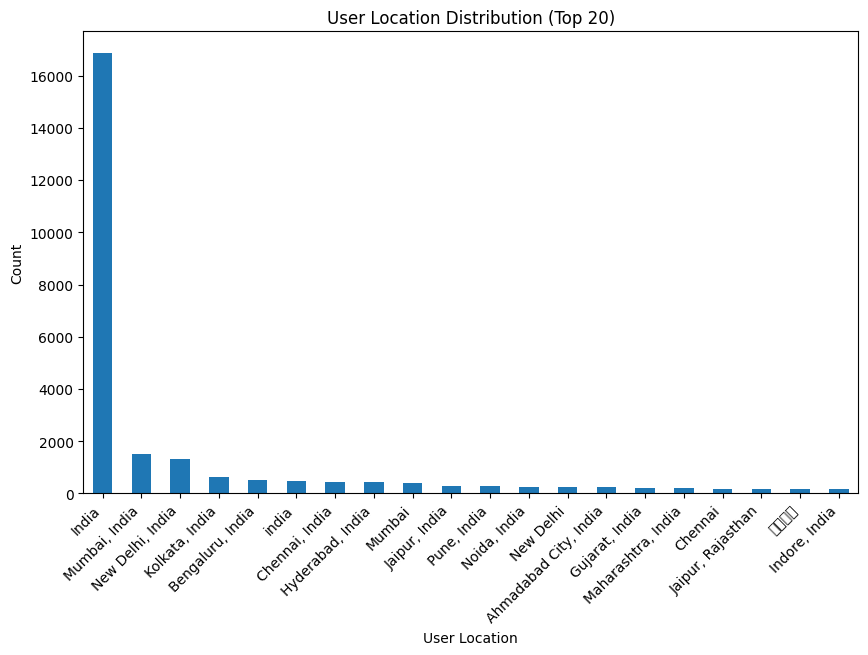

In [30]:
plt.figure(figsize=(10, 6))
dataset['user_location'].value_counts().head(20).plot(kind='bar')
plt.title('User Location Distribution (Top 20)')
plt.xlabel('User Location')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

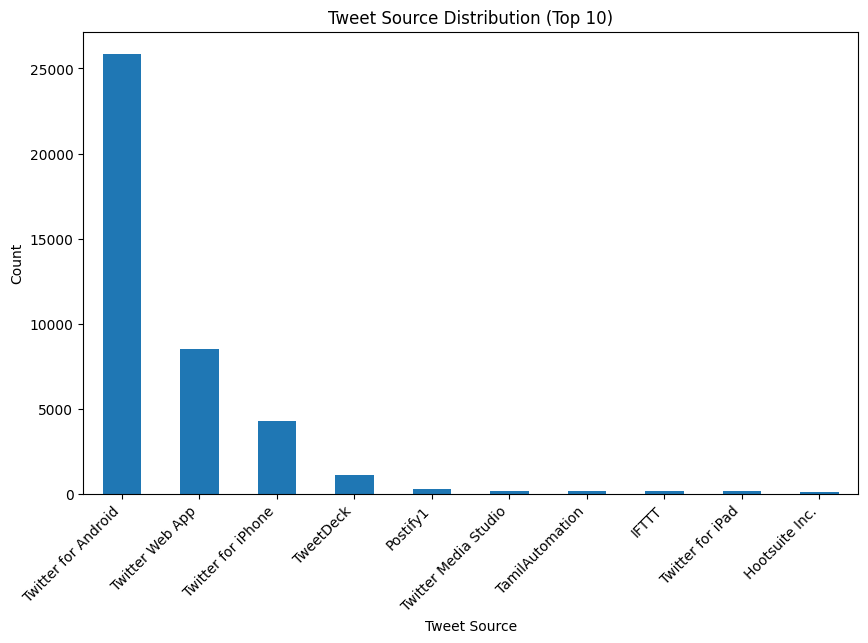

In [31]:
plt.figure(figsize=(10, 6))
dataset['source'].value_counts().head(10).plot(kind='bar')
plt.title('Tweet Source Distribution (Top 10)')
plt.xlabel('Tweet Source')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

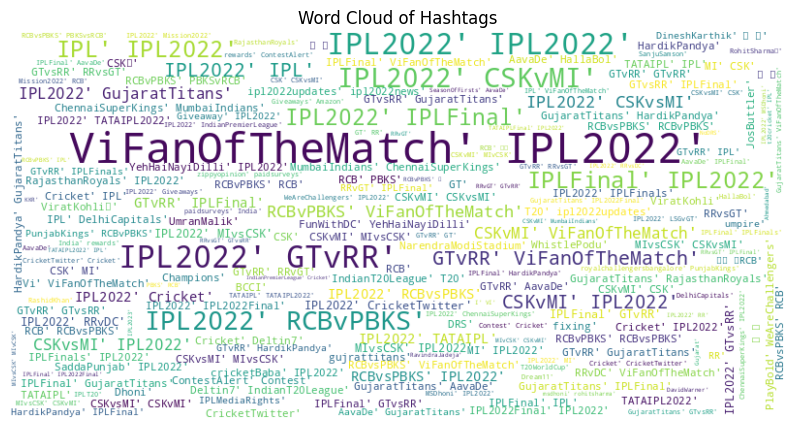

In [32]:
hashtags = ' '.join(dataset['hashtags'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(hashtags)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Hashtags')
plt.show()

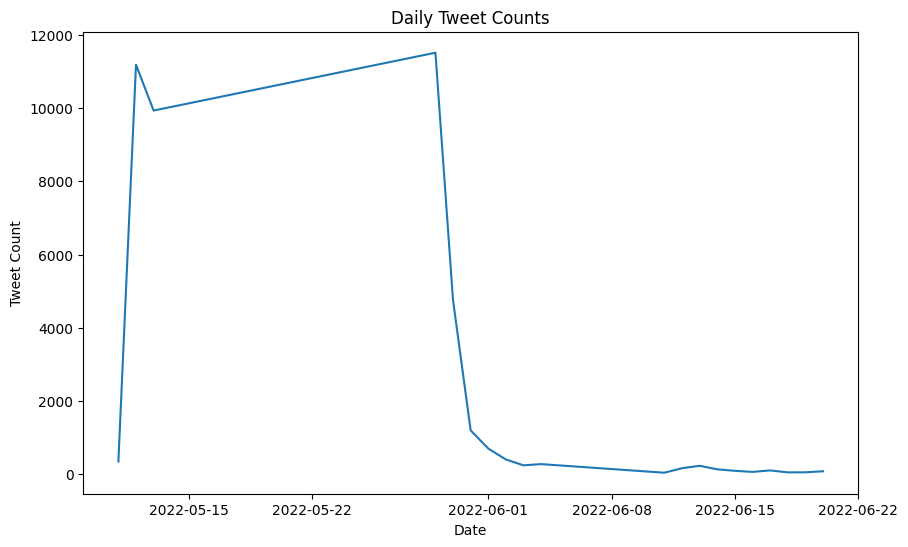

In [33]:
dataset['date'] = pd.to_datetime(dataset['date'])
dataset['date'].dt.date.value_counts().sort_index().plot(kind='line', figsize=(10, 6))
plt.title('Daily Tweet Counts')
plt.xlabel('Date')
plt.ylabel('Tweet Count')
plt.show()

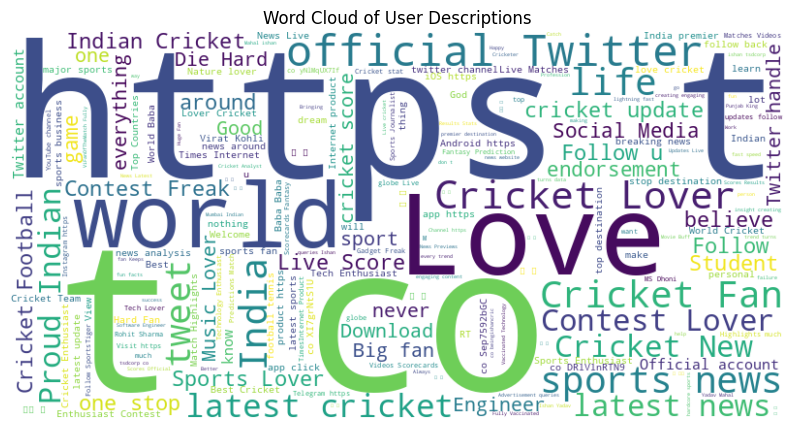

In [34]:
user_descriptions = ' '.join(dataset['user_description'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(user_descriptions)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of User Descriptions')
plt.show()

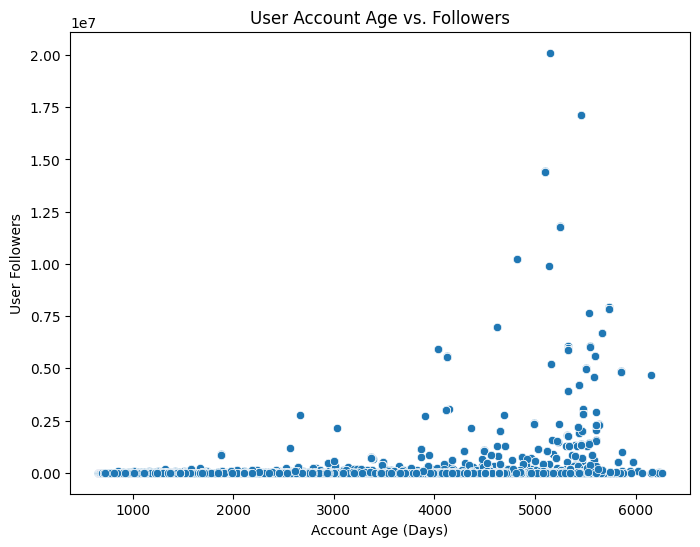

In [35]:
plt.figure(figsize=(8, 6))
dataset['user_created'] = pd.to_datetime(dataset['user_created'])
dataset['account_age_days'] = (pd.Timestamp.now() - dataset['user_created']).dt.days
sns.scatterplot(x='account_age_days', y='user_followers', data=dataset)
plt.title('User Account Age vs. Followers')
plt.xlabel('Account Age (Days)')
plt.ylabel('User Followers')
plt.show()

# Topic modeling ---> content analysis

In [36]:
from gensim import corpora, models
import gensim
from gensim.models import Phrases

In [37]:
unigram = [sent for sent in dataset['stemmed_tokens']]
bigram = Phrases(unigram, min_count=5, threshold=100)
trigram = Phrases(bigram[unigram], min_count=5, threshold=100)

In [40]:
unigram_phraser = models.phrases.Phraser(bigram)
bigram_phraser = models.phrases.Phraser(trigram)
dataset['ngram_tokens'] = dataset['stemmed_tokens'].apply(lambda x: bigram_phraser[unigram_phraser[x]])

In [43]:
dictionary = corpora.Dictionary(dataset['ngram_tokens'])

# Create Corpus
corpus = [dictionary.doc2bow(text) for text in dataset['ngram_tokens']]

# Train LDA model
lda_model = gensim.models.LdaMulticore(corpus, num_topics=5, id2word=dictionary, passes=2, workers=2)


In [44]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.036*"wicket" + 0.030*"5" + 0.027*"run" + 0.027*"2" + 0.020*"an" + 0.018*"3" + 0.018*"answer" + 0.015*"11" + 0.014*"win" + 0.013*"catch"
Topic: 1 
Words: 0.015*"match" + 0.015*"dr" + 0.015*"umpir" + 0.011*"’" + 0.008*"like" + 0.008*"today" + 0.007*"one" + 0.007*"get" + 0.006*"cricket" + 0.006*"bat"
Topic: 2 
Words: 0.023*"ipl" + 0.021*"gujarat" + 0.019*"titan" + 0.017*"match" + 0.016*"wicket" + 0.014*"win" + 0.014*"final" + 0.013*"season" + 0.008*"2022" + 0.007*"champion"
Topic: 3 
Words: 0.031*"csk" + 0.017*"mi" + 0.017*"ipl" + 0.012*"team" + 0.012*"vs" + 0.011*"match" + 0.010*"amp" + 0.010*"rcb" + 0.009*"mumbai" + 0.009*"2022"
Topic: 4 
Words: 0.035*"run" + 0.033*"ipl" + 0.023*"team" + 0.018*"win" + 0.014*"🏆" + 0.014*"2022" + 0.013*"play" + 0.013*"player" + 0.012*"congratul" + 0.011*"cricket"


In [45]:
topics = {
    'Topic 0': [('wicket', 0.036), ('5', 0.030), ('run', 0.027), ('2', 0.027), ('an', 0.020), ('3', 0.018), ('answer', 0.018), ('11', 0.015), ('win', 0.014), ('catch', 0.013)],
    'Topic 1': [('match', 0.015), ('dr', 0.015), ('umpir', 0.015), ('’', 0.011), ('like', 0.008), ('today', 0.008), ('one', 0.007), ('get', 0.007), ('cricket', 0.006), ('bat', 0.006)],
    'Topic 2': [('ipl', 0.023), ('gujarat', 0.021), ('titan', 0.019), ('match', 0.017), ('wicket', 0.016), ('win', 0.014), ('final', 0.014), ('season', 0.013), ('2022', 0.008), ('champion', 0.007)],
    'Topic 3': [('csk', 0.031), ('mi', 0.017), ('ipl', 0.017), ('team', 0.012), ('vs', 0.012), ('match', 0.011), ('amp', 0.010), ('rcb', 0.010), ('mumbai', 0.009), ('2022', 0.009)],
    'Topic 4': [('run', 0.035), ('ipl', 0.033), ('team', 0.023), ('win', 0.018), ('🏆', 0.014), ('2022', 0.014), ('play', 0.013), ('player', 0.013), ('congratul', 0.012), ('cricket', 0.011)]
}

# Convert the dictionary into a DataFrame
df_topics = pd.DataFrame({topic: [word for word, weight in words] for topic, words in topics.items()})

# Print the DataFrame
print(df_topics)

  Topic 0  Topic 1   Topic 2 Topic 3    Topic 4
0  wicket    match       ipl     csk        run
1       5       dr   gujarat      mi        ipl
2     run    umpir     titan     ipl       team
3       2        ’     match    team        win
4      an     like    wicket      vs          🏆
5       3    today       win   match       2022
6  answer      one     final     amp       play
7      11      get    season     rcb     player
8     win  cricket      2022  mumbai  congratul
9   catch      bat  champion    2022    cricket


In [50]:
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import bigrams, trigrams
import pandas as pd

# Load IPL tweets dataset
#df = pd.read_csv('ipl_tweets.csv')

# Sample text data (replace this with your actual text data)
text_data = dataset['cleaned_tweet'].tolist()

# Tokenize the text data and remove stopwords
stop_words = set(stopwords.words('english'))
unigrams = []
bigrams_list = []
trigrams_list = []

for text in text_data:
    tokens = word_tokenize(text)
    tokens = [token.lower() for token in tokens if token.isalnum() and token.lower() not in stop_words]
    unigrams.extend(tokens)
    bigrams_list.extend(list(bigrams(tokens)))
    trigrams_list.extend(list(trigrams(tokens)))

# Count unigrams, bigrams, and trigrams
unigram_counts = Counter(unigrams)
bigram_counts = Counter(bigrams_list)
trigram_counts = Counter(trigrams_list)

# Get the most common unigrams, bigrams, and trigrams
most_common_unigrams = unigram_counts.most_common(10)
most_common_bigrams = bigram_counts.most_common(10)
most_common_trigrams = trigram_counts.most_common(10)

# Print the results
print("Most common unigrams:")
print(most_common_unigrams)
print("\nMost common bigrams:")
print(most_common_bigrams)
print("\nMost common trigrams:")
print(most_common_trigrams)


Most common unigrams:
[('ipl', 6273), ('runs', 3462), ('team', 3299), ('season', 3206), ('2022', 2771), ('match', 2713), ('win', 2660), ('congratulations', 2602), ('gujarat', 2396), ('wickets', 2339)]

Most common bigrams:
[(('gujarat', 'titans'), 1894), (('ipl', '2022'), 1811), (('hardik', 'pandya'), 865), (('5', 'wickets'), 668), (('jos', 'buttler'), 652), (('matthew', 'wade'), 636), (('mumbai', 'indians'), 607), (('rajasthan', 'royals'), 573), (('trent', 'boult'), 544), (('shubman', 'gill'), 479)]

Most common trigrams:
[(('chennai', 'super', 'kings'), 414), (('cricket', 'top', 'countries'), 280), (('top', 'countries', 'best'), 280), (('countries', 'best', 'cricket'), 280), (('best', 'cricket', 'fans'), 280), (('2', 'dot', 'balls'), 240), (('congratulations', 'gujarat', 'titans'), 226), (('7', 'extra', 'runs'), 223), (('a16', 'matthew', 'wade'), 207), (('royal', 'challengers', 'bangalore'), 190)]


# Location analysis


In [52]:
import pandas as pd

# Filter out rows where user_location is not available
df_filtered = dataset.dropna(subset=['user_location'])

# Count the number of tweets from each location
location_counts = df_filtered['user_location'].value_counts()

# Print the top 10 locations with the most tweets
print("Top 10 locations with the most tweets:")
print(location_counts.head(10))

Top 10 locations with the most tweets:
user_location
India               16848
Mumbai, India        1527
New Delhi, India     1303
Kolkata, India        620
Bengaluru, India      518
india                 469
Chennai, India        445
Hyderabad, India      440
Mumbai                401
Jaipur, India         296
Name: count, dtype: int64


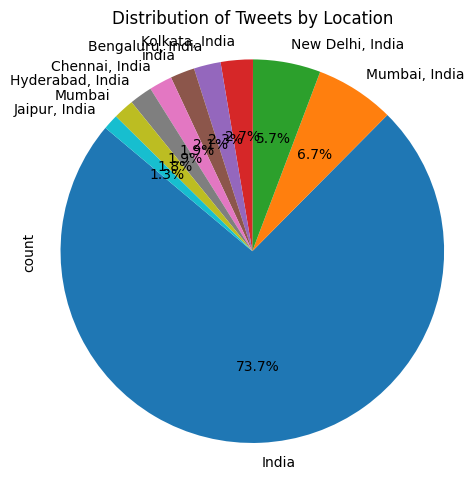

In [54]:
plt.figure(figsize=(5,5))
location_counts.head(10).plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Tweets by Location')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

# Hashtag analysis

In [57]:
import pandas as pd

# Load IPL tweets dataset
# df = pd.read_csv('ipl_tweets.csv')

# Filter out rows where user_location is not available
df_filtered = dataset.dropna(subset=['user_location'])

# Get the top 10 locations with the most tweets
top_10_locations = df_filtered['user_location'].value_counts().head(10).index

# Initialize a dictionary to store hashtag counts for each top 10 location
hashtag_counts_per_location = {}

# Iterate over each top 10 location
for location in top_10_locations:
    # Filter the dataset for tweets from the current location
    location_df = df_filtered[df_filtered['user_location'] == location]

    # Extract hashtags from tweets in the current location
    hashtags = [hashtag.lower() for tweet in location_df['hashtags'] if isinstance(tweet, str) for hashtag in tweet.split()]

    # Count the occurrences of each hashtag
    hashtag_counts = pd.Series(hashtags).value_counts()

    # Store the hashtag counts for the current location
    hashtag_counts_per_location[location] = hashtag_counts

# Analyze and print the popularity of hashtags for each top 10 location
for location, hashtag_counts in hashtag_counts_per_location.items():
    print(f"Top 10 hashtags in {location}:")
    print(hashtag_counts.head(10))
    print()


Top 10 hashtags in India:
'ipl2022',             8659
['vifanofthematch',    3914
['ipl2022',            3298
'ipl2022']             3295
'gtvrr']               1907
['ipl2022']            1762
'ipl',                 1760
'cskvmi']              1257
'iplfinal',            1215
'rcbvpbks']            1065
Name: count, dtype: int64

Top 10 hashtags in Mumbai, India:
'ipl2022',             778
['vifanofthematch',    485
'ipl2022']             314
['ipl2022',            295
'rcbvpbks']            209
'cskvmi']              168
'gtvrr']               167
['ipl2022']            153
'tataipl',             119
'iplfinal',             83
Name: count, dtype: int64

Top 10 hashtags in New Delhi, India:
'ipl2022',             541
['ipl2022',            451
['vifanofthematch',    246
'ipl2022']             215
'cskvmi']              154
'ipl',                 151
'gtvrr']               115
'rcbvpbks']            109
['ipl2022']            106
'iplfinal',            105
Name: count, dtype: int64

To

# Sentiment analysis

In [58]:
import pandas as pd

# Load IPL tweets dataset
# df = pd.read_csv('ipl_tweets.csv')

# Convert the 'date' column to datetime format
dataset['date'] = pd.to_datetime(dataset['date'])

# Extract date from the 'date' column
dataset['date'] = dataset['date'].dt.date

# Initialize a dictionary to store hashtag counts for each date
hashtag_counts_per_date = {}

# Iterate over each date
for date in dataset['date'].unique():
    # Filter the dataset for tweets on the current date
    date_df = dataset[dataset['date'] == date]

    # Extract hashtags from tweets on the current date
    hashtags = [hashtag.lower() for tweet in date_df['hashtags'] if isinstance(tweet, str) for hashtag in tweet.split()]

    # Count the occurrences of each hashtag
    hashtag_counts = pd.Series(hashtags).value_counts()

    # Store the hashtag counts for the current date
    hashtag_counts_per_date[date] = hashtag_counts

# Analyze and print the popularity of hashtags for each date
for date, hashtag_counts in hashtag_counts_per_date.items():
    print(f"Top 10 hashtags on {date}:")
    print(hashtag_counts.head(10))
    print()


Top 10 hashtags on 2022-06-20:
'ipl2022',         59
'cricket',         45
'ipl',             25
['cricketbaba',    22
'deltin7',         22
't20',             22
'tataipl',         19
'icc',             19
['giveaway',       17
'ttc']             17
Name: count, dtype: int64

Top 10 hashtags on 2022-06-19:
'ipl2022',            46
'cricket',            33
['cricketbaba',       20
'deltin7',            20
't20',                20
'ipl2022news',        15
'ipl',                15
'indiant20league',    14
'icc',                12
'ttcacademy',          9
Name: count, dtype: int64

Top 10 hashtags on 2022-06-18:
'ipl2022',            38
'cricket',            24
['cricketbaba',       20
'deltin7',            20
't20',                20
'ipl2022news',        15
'indiant20league',    14
'icc',                11
'ipl2022updates',     10
['ipl2022',            8
Name: count, dtype: int64

Top 10 hashtags on 2022-06-17:
'ipl2022',         54
['ipl2022',        37
'indvsa',          24
'cricket'

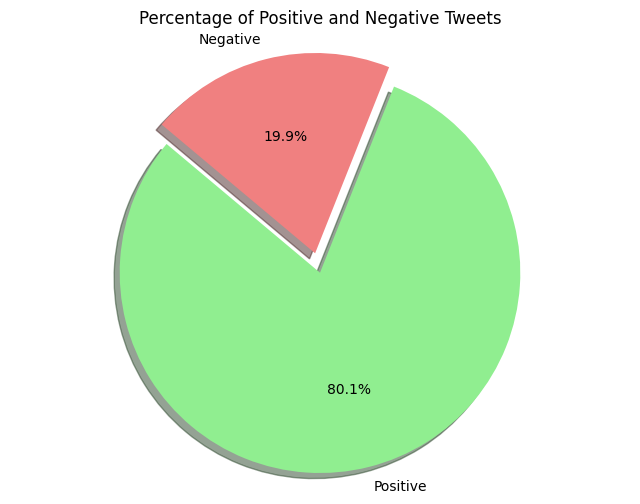

In [60]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

# Load IPL tweets dataset
# dataset = pd.read_csv('ipl_tweets.csv')

# Define a function to perform sentiment analysis and identify positive and negative tweets
def analyze_sentiment(text):
    analysis = TextBlob(text)
    # Assign polarity scores ranging from -1 (most negative) to 1 (most positive)
    return analysis.sentiment.polarity

# Apply sentiment analysis to each tweet in the dataset
dataset['sentiment_score'] = dataset['cleaned_tweet'].apply(analyze_sentiment)

# Filter positive and negative tweets based on sentiment score
positive_tweets = dataset[dataset['sentiment_score'] > 0]
negative_tweets = dataset[dataset['sentiment_score'] < 0]

# Calculate the percentage of positive and negative tweets out of all tweets
total_tweets = len(dataset)
positive_percentage = (len(positive_tweets) / total_tweets) * 100
negative_percentage = (len(negative_tweets) / total_tweets) * 100

# Create a pie chart to visualize the percentage of positive and negative tweets
labels = ['Positive', 'Negative']
sizes = [positive_percentage, negative_percentage]
colors = ['lightgreen', 'lightcoral']
explode = (0.1, 0)  # explode the 1st slice (positive)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Percentage of Positive and Negative Tweets')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


In [61]:
# Print some examples of positive tweets
print("Examples of Positive Tweets:")
for i, tweet in enumerate(positive_tweets['cleaned_tweet'].head(5), start=1):
    print(f"Positive Tweet {i}: {tweet}")
    print()

# Print some examples of negative tweets
print("Examples of Negative Tweets:")
for i, tweet in enumerate(negative_tweets['cleaned_tweet'].head(5), start=1):
    print(f"Negative Tweet {i}: {tweet}")
    print()


Examples of Positive Tweets:
Positive Tweet 1: 👉world cricket baba👈 top countries with the 
 🏆 best cricket fans 🏆 in the new zealand
          

Positive Tweet 2: how fans of    and  reacted to the two new ipl teams  gujarat titans and lucknow super giants  
     



Positive Tweet 3: 👉world cricket baba👈 top countries with the 
 🏆 best cricket fans 🏆 in the afghanistan
          

Positive Tweet 4:  wow
3 ducks with 3 chicks


Positive Tweet 5: 👉world cricket baba👈 top countries with the 
 🏆 best cricket fans 🏆 england
           

Examples of Negative Tweets:
Negative Tweet 1: ⤵️
“he needs a complete and controlled rehab to recover from the groin injury it has been hurting him a lot for the last few months he felt pain during  as well but it wasn’t that serious hopefully he will recover in time for the  tour”

speedy recovery skip 💪

Negative Tweet 2:   who last played a test match for  in december 2021 scored 317 runs across 11 games at an average of 3170 in 



Negative Tweet 3:  